Epoch 1/100
824/824 [==============================] - 13s 8ms/step - loss: 1.9608 - accuracy: 0.8656 - val_loss: 0.2675 - val_accuracy: 0.9050
Epoch 2/100
824/824 [==============================] - 2s 3ms/step - loss: 0.6815 - accuracy: 0.8727 - val_loss: 0.4295 - val_accuracy: 0.8950
Epoch 3/100
824/824 [==============================] - 2s 3ms/step - loss: 0.5689 - accuracy: 0.8789 - val_loss: 0.4463 - val_accuracy: 0.8945
Epoch 4/100
824/824 [==============================] - 2s 3ms/step - loss: 0.5269 - accuracy: 0.8812 - val_loss: 0.3122 - val_accuracy: 0.8983
Epoch 5/100
824/824 [==============================] - 2s 3ms/step - loss: 0.5043 - accuracy: 0.8820 - val_loss: 1.1500 - val_accuracy: 0.8851
Epoch 6/100
824/824 [==============================] - 4s 5ms/step - loss: 0.4427 - accuracy: 0.8820 - val_loss: 0.2458 - val_accuracy: 0.8989
Epoch 7/100
824/824 [==============================] - 2s 3ms/step - loss: 0.4101 - accuracy: 0.8858 - val_loss: 0.6887 - val_accuracy: 0.884

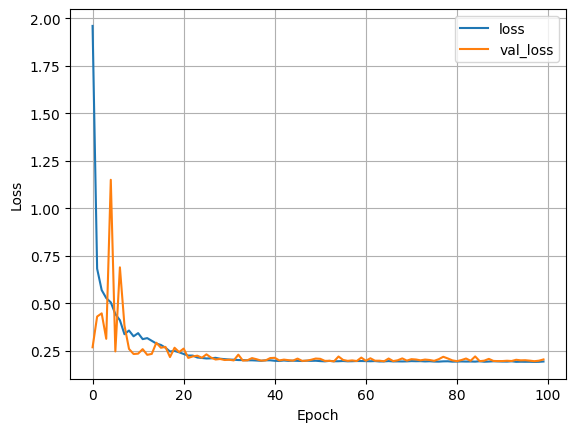

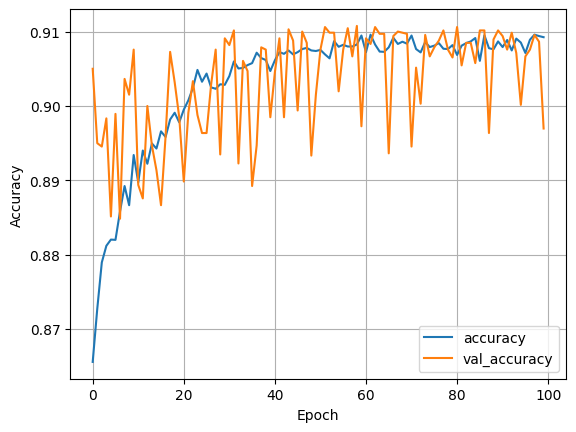

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


cols = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.prince.idx", "cons.conf.idx", "euribor3m", "nr.employed", "divorce_status"]
df = pd.read_csv("bank-additional-full.csv", sep=';', names=cols, header=0)

X = df.drop('divorce_status', axis=1)
y = df['divorce_status']

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_encoded.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

plot_loss(history)
plot_accuracy(history)